In [72]:
import pandas as pd

In [73]:
from textblob import TextBlob 
from textblob import Blobber
from textblob_fr import PatternTagger, PatternAnalyzer
from textblob_nl import PatternTagger, PatternAnalyzer
tb_fr = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())


In [74]:
df = pd.read_csv('clean_french_data.csv')

In [75]:
df = df[['title', 'text', 'date', 'url', '_id']]

In [76]:
df.head()

,title,text,date,url,_id
0,La qualité de l’air en nette amélioration à Br...,Les concentrations de différents polluants rel...,2020-05-22T04:22:52.000Z,https://plus.lesoir.be/302282/article/2020-05-...,5ec760320e5c92500d004aee
1,Coronavirus à Bruxelles : on respire mieux grâ...,L’amélioration de la qualité de l’air bruxello...,2020-05-22T04:37:03.000Z,https://www.rtbf.be/info/regions/detail_corona...,5ec7603216193c3860cf1616
2,La Chambre vote une résolution encadrant l’usa...,La résolution pose plusieurs principes tel que...,2020-05-20T19:36:26.000Z,https://plus.lesoir.be/302121/article/2020-05-...,5ec76032039b233f9642aeb6
3,Plus de cinq millions de cas de Covid-19 dans ...,Le nouveau coronavirus a officiellement touché...,2020-05-21T21:01:32.000Z,https://plus.lesoir.be/302273/article/2020-05-...,5ec760320e5c92500d004af3
4,Coronavirus en Belgique : les ouvriers plus to...,Les résultats d’une enquête menée par le prest...,2020-05-22T04:00:00.000Z,https://www.rtbf.be/info/economie/detail_coron...,5ec7603216193c3860cf161f


In [77]:
key_words_data = ['données personnelles','base des données', 'confidentialité','partager des données', 'accès aux données', 'réutilisation des données', 'utilisation des données', 'analyse des données', 'usage des données', 'protection des données']

In [78]:
df.iloc[2,0]

'La Chambre vote une résolution encadrant l’usage éventuel d’une application pour smartphone'

In [137]:
df = df.drop_duplicates(subset=['text'])

In [139]:
len(df)

5434

In [81]:
list_data = []
for row in range(len(df)):
    if any(word in str(df.iloc[row, 1]) for word in key_words_data):
        if str(df.iloc[row, 1]) not in list_data:
            list_data.append(str(df.iloc[row, 1]))

In [82]:
len(list_data)

5434

In [83]:
list_data[1]

'En 2013, Google créait une nouvelle filiale, Calico. Son but, un brin ambitieux : « tuer la mort ». Dit autrement, lutter contre le vieillissement en ressuscitant le vieux fantasme de transhumanisme consistant à « augmenter » l’humain grâce à la technologie. Calico ne donne aujourd’hui plus signe de vie. Mais entre-temps, Google a conclu un accord controversé avec 150 hôpitaux aux Etats-Unis lui offrant un accès aux données médicales de millions de patients. En 2014, elle rachetait Deepmind pour 628 millions de dollars. La branche « Intelligence artificielle » de Google utilise les données sur les génomes pour prédire la structure des protéines des organismes, ce qui pourrait permettre de dégager une réponse thérapeutique au Covid-19.'

In [84]:
df = df[df['text'].isin(list_data)]

In [85]:
def get_polarity_fr(doc):
        polarity = tb_fr(doc).sentiment[0]
        return polarity

In [86]:
df.head()

,title,text,date,url,_id
5,9 millions de clients concernés par une cybera...,"Dans un faible nombre de cas, les pirates ont ...",2020-05-19T11:53:50.000Z,https://plus.lesoir.be/301778/article/2020-05-...,5ec760338ae8910eece4965c
6,«Docteur Google» va-t-il sauver le monde?,"En 2013, Google créait une nouvelle filiale, C...",2020-05-16T10:04:58.000Z,https://plus.lesoir.be/301269/article/2020-05-...,5ec760338ae8910eece4965f
10,Gafam: le casse du siècle,"Quand le monde physique est à l’arrêt, le virt...",2020-05-09T04:00:00.000Z,https://plus.lesoir.be/299710/article/2020-05-...,5ec760338c227f981359e4d3
14,UClouvain : des tests avec bugs et des étudian...,C’est une session d’examens inédite qui se pré...,2020-05-21T13:15:39.000Z,https://www.rtbf.be/info/regions/detail_uclouv...,5ec7603416193c3860cf1659
15,Traçage de contacts: Google et Apple mettent à...,Les américains Apple et Google ont mis à la di...,2020-05-20T20:17:35.000Z,https://www.lalibre.be/economie/digital/tracag...,5ec76034a34eca094d2ced09


In [132]:
polarity_list = []
for row in range(len(df)): 
    polarity_list.append(round(get_polarity_fr(str(df.iloc[row,1])),5))
    

In [129]:
polarity_list[:4]

[0.0, -0.7, 0.7, 0.23333]

In [133]:
df.head()

,title,text,date,url,_id,polarity
5,9 millions de clients concernés par une cybera...,"Dans un faible nombre de cas, les pirates ont ...",2020-05-19T11:53:50.000Z,https://plus.lesoir.be/301778/article/2020-05-...,5ec760338ae8910eece4965c,0.000000
6,«Docteur Google» va-t-il sauver le monde?,"En 2013, Google créait une nouvelle filiale, C...",2020-05-16T10:04:58.000Z,https://plus.lesoir.be/301269/article/2020-05-...,5ec760338ae8910eece4965f,-0.700000
10,Gafam: le casse du siècle,"Quand le monde physique est à l’arrêt, le virt...",2020-05-09T04:00:00.000Z,https://plus.lesoir.be/299710/article/2020-05-...,5ec760338c227f981359e4d3,0.700000
14,UClouvain : des tests avec bugs et des étudian...,C’est une session d’examens inédite qui se pré...,2020-05-21T13:15:39.000Z,https://www.rtbf.be/info/regions/detail_uclouv...,5ec7603416193c3860cf1659,0.233333
15,Traçage de contacts: Google et Apple mettent à...,Les américains Apple et Google ont mis à la di...,2020-05-20T20:17:35.000Z,https://www.lalibre.be/economie/digital/tracag...,5ec76034a34eca094d2ced09,0.025000


In [134]:
polarity_list[:10]

[0.0, -0.7, 0.7, 0.23333, 0.025, 0.2, -0.7, -0.1, -0.5, -0.0]

In [91]:
df['polarity'] = polarity_list

In [93]:
df.head(10)

,title,text,date,url,_id,polarity
5,9 millions de clients concernés par une cybera...,"Dans un faible nombre de cas, les pirates ont ...",2020-05-19T11:53:50.000Z,https://plus.lesoir.be/301778/article/2020-05-...,5ec760338ae8910eece4965c,0.000000e+00
6,«Docteur Google» va-t-il sauver le monde?,"En 2013, Google créait une nouvelle filiale, C...",2020-05-16T10:04:58.000Z,https://plus.lesoir.be/301269/article/2020-05-...,5ec760338ae8910eece4965f,-7.000000e-01
10,Gafam: le casse du siècle,"Quand le monde physique est à l’arrêt, le virt...",2020-05-09T04:00:00.000Z,https://plus.lesoir.be/299710/article/2020-05-...,5ec760338c227f981359e4d3,7.000000e-01
14,UClouvain : des tests avec bugs et des étudian...,C’est une session d’examens inédite qui se pré...,2020-05-21T13:15:39.000Z,https://www.rtbf.be/info/regions/detail_uclouv...,5ec7603416193c3860cf1659,2.333333e-01
15,Traçage de contacts: Google et Apple mettent à...,Les américains Apple et Google ont mis à la di...,2020-05-20T20:17:35.000Z,https://www.lalibre.be/economie/digital/tracag...,5ec76034a34eca094d2ced09,2.500000e-02
37,"Le suivi des contacts, un ""moyen de prédilect...",En l'absence d'un médicament approprié et d'un...,2020-05-19T11:30:19.000Z,https://www.lalibre.be/belgique/societe/le-sui...,5ec7603552aa423524e876af,2.000000e-01
39,La Flandre estime avoir droit à davantage de ...,La Flandre a droit à une part considérablement...,2020-05-14T17:31:35.000Z,https://www.lalibre.be/belgique/politique-belg...,5ec760352251bf83fd64ad5c,-7.000000e-01
56,La compagnie aérienne Easyjet dit avoir subi ...,La compagnie aérienne britannique EasyJet a an...,2020-05-19T10:24:59.000Z,https://www.lalibre.be/economie/entreprises-st...,5ec7603703ad145e58d01785,-1.000000e-01
58,Amende de 50.000 euros pour Proximus pour non-...,Proximus écope d'une amende record de 50.000 e...,2020-05-18T17:28:01.000Z,https://www.lalibre.be/economie/entreprises-st...,5ec7603803ad145e58d0178a,-5.000000e-01
76,Toutes les décisions de justice seront biento...,Une opinion de Christophe Dubois (Professeur d...,2020-05-18T07:39:56.000Z,https://www.lalibre.be/debats/opinions/la-publ...,5ec7603d4b97c1c00b879813,-3.965082e-18


In [135]:
df['language'] = 'fr'

In [136]:
df.head()

,title,text,date,url,_id,polarity,language
5,9 millions de clients concernés par une cybera...,"Dans un faible nombre de cas, les pirates ont ...",2020-05-19T11:53:50.000Z,https://plus.lesoir.be/301778/article/2020-05-...,5ec760338ae8910eece4965c,0.000000,fr
6,«Docteur Google» va-t-il sauver le monde?,"En 2013, Google créait une nouvelle filiale, C...",2020-05-16T10:04:58.000Z,https://plus.lesoir.be/301269/article/2020-05-...,5ec760338ae8910eece4965f,-0.700000,fr
10,Gafam: le casse du siècle,"Quand le monde physique est à l’arrêt, le virt...",2020-05-09T04:00:00.000Z,https://plus.lesoir.be/299710/article/2020-05-...,5ec760338c227f981359e4d3,0.700000,fr
14,UClouvain : des tests avec bugs et des étudian...,C’est une session d’examens inédite qui se pré...,2020-05-21T13:15:39.000Z,https://www.rtbf.be/info/regions/detail_uclouv...,5ec7603416193c3860cf1659,0.233333,fr
15,Traçage de contacts: Google et Apple mettent à...,Les américains Apple et Google ont mis à la di...,2020-05-20T20:17:35.000Z,https://www.lalibre.be/economie/digital/tracag...,5ec76034a34eca094d2ced09,0.025000,fr


In [204]:
df.head()

,title,text,date,url,_id,polarity,language
5,9 millions de clients concernés par une cybera...,"Dans un faible nombre de cas, les pirates ont ...",2020-05-19T11:53:50.000Z,https://plus.lesoir.be/301778/article/2020-05-...,5ec760338ae8910eece4965c,0.000000,fr
6,«Docteur Google» va-t-il sauver le monde?,"En 2013, Google créait une nouvelle filiale, C...",2020-05-16T10:04:58.000Z,https://plus.lesoir.be/301269/article/2020-05-...,5ec760338ae8910eece4965f,-0.700000,fr
10,Gafam: le casse du siècle,"Quand le monde physique est à l’arrêt, le virt...",2020-05-09T04:00:00.000Z,https://plus.lesoir.be/299710/article/2020-05-...,5ec760338c227f981359e4d3,0.700000,fr
14,UClouvain : des tests avec bugs et des étudian...,C’est une session d’examens inédite qui se pré...,2020-05-21T13:15:39.000Z,https://www.rtbf.be/info/regions/detail_uclouv...,5ec7603416193c3860cf1659,0.233333,fr
15,Traçage de contacts: Google et Apple mettent à...,Les américains Apple et Google ont mis à la di...,2020-05-20T20:17:35.000Z,https://www.lalibre.be/economie/digital/tracag...,5ec76034a34eca094d2ced09,0.025000,fr


In [142]:
import re
import matplotlib

In [228]:
df.set_index('_id', inplace = True)

In [229]:
df.head()

,title,text,date,url,polarity,language
_id,,,,,,
5ec760338ae8910eece4965c,9 millions de clients concernés par une cybera...,"Dans un faible nombre de cas, les pirates ont ...",2020-05-19T11:53:50.000Z,https://plus.lesoir.be/301778/article/2020-05-...,0.000000,fr
5ec760338ae8910eece4965f,«Docteur Google» va-t-il sauver le monde?,"En 2013, Google créait une nouvelle filiale, C...",2020-05-16T10:04:58.000Z,https://plus.lesoir.be/301269/article/2020-05-...,-0.700000,fr
5ec760338c227f981359e4d3,Gafam: le casse du siècle,"Quand le monde physique est à l’arrêt, le virt...",2020-05-09T04:00:00.000Z,https://plus.lesoir.be/299710/article/2020-05-...,0.700000,fr
5ec7603416193c3860cf1659,UClouvain : des tests avec bugs et des étudian...,C’est une session d’examens inédite qui se pré...,2020-05-21T13:15:39.000Z,https://www.rtbf.be/info/regions/detail_uclouv...,0.233333,fr
5ec76034a34eca094d2ced09,Traçage de contacts: Google et Apple mettent à...,Les américains Apple et Google ont mis à la di...,2020-05-20T20:17:35.000Z,https://www.lalibre.be/economie/digital/tracag...,0.025000,fr


In [308]:
df.reset_index(drop=False, inplace=True)


In [314]:
x = str(df.head(2)['date'])

In [313]:
re.search('\d\d\d\d', str(x))

<re.Match object; span=(5, 9), match='2020'>

In [316]:
len(df['date'])

5434

In [320]:
def change_year(column):
    def find_year(s: str):
            matcher = re.search('\d\d\d\d',str(s))
            
            return int(matcher.group(0))
            
    column = column.apply(find_year)
    return column
    

In [321]:
df['date'] = change_year(df['date'])

In [323]:
df['date'].unique()

array([2020, 2021, 2022, 2023])

In [324]:
df_fr = df

In [328]:
df_fr

,_id,title,text,date,url,polarity,language
0,5ec760338ae8910eece4965c,9 millions de clients concernés par une cybera...,"Dans un faible nombre de cas, les pirates ont ...",2020,https://plus.lesoir.be/301778/article/2020-05-...,0.000000,fr
1,5ec760338ae8910eece4965f,«Docteur Google» va-t-il sauver le monde?,"En 2013, Google créait une nouvelle filiale, C...",2020,https://plus.lesoir.be/301269/article/2020-05-...,-0.700000,fr
2,5ec760338c227f981359e4d3,Gafam: le casse du siècle,"Quand le monde physique est à l’arrêt, le virt...",2020,https://plus.lesoir.be/299710/article/2020-05-...,0.700000,fr
3,5ec7603416193c3860cf1659,UClouvain : des tests avec bugs et des étudian...,C’est une session d’examens inédite qui se pré...,2020,https://www.rtbf.be/info/regions/detail_uclouv...,0.233333,fr
4,5ec76034a34eca094d2ced09,Traçage de contacts: Google et Apple mettent à...,Les américains Apple et Google ont mis à la di...,2020,https://www.lalibre.be/economie/digital/tracag...,0.025000,fr
...,...,...,...,...,...,...,...
5429,64c5598b3c8e1ee157d07d9d,Le président colombien Gustavo Petro annonce l...,Le parquet a précisé que Nicolas Petro avait é...,2023,https://www.lalibre.be/international/amerique/...,0.000000,fr
5430,64c78c0916258834714f278d,La Mini Interaction Unit et son écran OLED ron...,La Mini Interaction Unit fait son apparition s...,2023,https://www.levif.be/societe/mobilite/auto/la-...,0.166667,fr
5431,64c78c0916258834714f2791,"UE: la nomination de Scott Morton, nouvelle il...","Selon Franklin Dehousse, professeur à l’univer...",2023,https://www.levif.be/international/ue-la-nomin...,0.030000,fr
5432,64c78c0916258834714f2792,Les 10 derniers jours de juillet ont été les p...,Il n’a jamais autant plu en Belgique pour une ...,2023,https://www.levif.be/societe/environnement/les...,0.000000,fr


NL

In [329]:
df_nl = pd.read_csv('dutch_gegevens2.csv')

In [338]:
from langdetect import detect_langs
import numpy as np

In [334]:
df_nl

,_id,url,date,text,title
0,5ec806707db77e056c19b7d9,https://www.nieuwsblad.be/cnt/dmf20200522_0496...,2020-05-22T14:02:00.000Z,Koksijde - Nu de tweedeverblijvers naar de kus...,Burgemeester Koksijde wil informatie van conta...
1,5ec8067060653ee843c32706,https://www.nieuwsblad.be/cnt/dmf20200519_0496...,2020-05-20T01:25:00.000Z,Luchtvaartmaatschappij EasyJet is getroffen do...,Gegevens 9 miljoen EasyJet-klanten gestolen
2,5ec806708e00d85b900a3fd6,https://www.nieuwsblad.be/cnt/dmf20200519_0496...,2020-05-19T11:15:34.000Z,Vliegmaatschappij easyJet is getroffen door ee...,Easyjet heeft cyberaanval ondergaan: gegevens ...
3,5ec80673b64548ac45316e2f,https://www.tijd.be/r/t/1/id/10227446,2020-05-15T23:00:03.000Z,De bedrijfsdata-expert Graydon berekende onlan...,Wat kunt u als ondernemer doen als de bank ‘ne...
4,5ec80674d884dd1dc9f12bb1,https://www.tijd.be/r/t/1/id/10227443,2020-05-20T08:12:10.000Z,Passage uit een lezersbrief: ‘Mijn moeder is i...,Eindelijk regels voor snellere uitbetaling van...
...,...,...,...,...,...
9788,64cbf1095dae7248fec79bbf,https://www.nieuwsblad.be/cnt/dmf20230803_9650...,2023-08-03T18:01:24.000Z,"In de toekomst kunnen gebruikers persoonlijke,...",Google neemt extra maatregelen om gegevens van...
9789,64cbf10b53c69f079d30ab3a,https://www.knack.be/sport/wielrennen/hoe-zwaa...,2023-08-03T15:30:00.000Z,"Het WK-parcours in Glasgow is zeer apart, met ...",Hoe zwaar is het parcours van het WK wielrenne...
9790,64cc294a5da43581c500f102,https://www.hbvl.be/cnt/dmf20230803_96674721,2023-08-03T18:32:14.000Z,"In de toekomst kunnen gebruikers persoonlijke,...",Google neemt extra maatregelen om gegevens van...
9791,64cc294be11aee08766cff24,https://www.knack.be/nieuws/wereld/nieuwe-stud...,2023-08-03T17:19:24.000Z,De reddingsoperaties voor migranten in het cen...,Nieuwe studie: Reddingsoperaties op zee moedig...


In [340]:
languages= []
for row in range(len(df_nl)):
    languages.append(str(detect_langs(str((df_nl.iloc[row, 3])))))

In [352]:
len(languages)

9793

In [383]:
str(languages[1]).split(':')[0][1:]

'nl'

In [384]:
langs = [str(lang).split(':')[0][1:] for lang in languages]

In [386]:
langs_set = set(langs)

In [387]:
langs_set

{'af', 'fr', 'nl'}

In [394]:
df_nl['language'] = langs

In [395]:
df_nl

,_id,url,date,text,title,language
0,5ec806707db77e056c19b7d9,https://www.nieuwsblad.be/cnt/dmf20200522_0496...,2020-05-22T14:02:00.000Z,Koksijde - Nu de tweedeverblijvers naar de kus...,Burgemeester Koksijde wil informatie van conta...,nl
1,5ec8067060653ee843c32706,https://www.nieuwsblad.be/cnt/dmf20200519_0496...,2020-05-20T01:25:00.000Z,Luchtvaartmaatschappij EasyJet is getroffen do...,Gegevens 9 miljoen EasyJet-klanten gestolen,nl
2,5ec806708e00d85b900a3fd6,https://www.nieuwsblad.be/cnt/dmf20200519_0496...,2020-05-19T11:15:34.000Z,Vliegmaatschappij easyJet is getroffen door ee...,Easyjet heeft cyberaanval ondergaan: gegevens ...,nl
3,5ec80673b64548ac45316e2f,https://www.tijd.be/r/t/1/id/10227446,2020-05-15T23:00:03.000Z,De bedrijfsdata-expert Graydon berekende onlan...,Wat kunt u als ondernemer doen als de bank ‘ne...,nl
4,5ec80674d884dd1dc9f12bb1,https://www.tijd.be/r/t/1/id/10227443,2020-05-20T08:12:10.000Z,Passage uit een lezersbrief: ‘Mijn moeder is i...,Eindelijk regels voor snellere uitbetaling van...,nl
...,...,...,...,...,...,...
9788,64cbf1095dae7248fec79bbf,https://www.nieuwsblad.be/cnt/dmf20230803_9650...,2023-08-03T18:01:24.000Z,"In de toekomst kunnen gebruikers persoonlijke,...",Google neemt extra maatregelen om gegevens van...,nl
9789,64cbf10b53c69f079d30ab3a,https://www.knack.be/sport/wielrennen/hoe-zwaa...,2023-08-03T15:30:00.000Z,"Het WK-parcours in Glasgow is zeer apart, met ...",Hoe zwaar is het parcours van het WK wielrenne...,nl
9790,64cc294a5da43581c500f102,https://www.hbvl.be/cnt/dmf20230803_96674721,2023-08-03T18:32:14.000Z,"In de toekomst kunnen gebruikers persoonlijke,...",Google neemt extra maatregelen om gegevens van...,nl
9791,64cc294be11aee08766cff24,https://www.knack.be/nieuws/wereld/nieuwe-stud...,2023-08-03T17:19:24.000Z,De reddingsoperaties voor migranten in het cen...,Nieuwe studie: Reddingsoperaties op zee moedig...,nl


In [402]:
df_nl = df_nl[df_nl['language'] == 'nl']

In [403]:
len(df_nl)

9789

In [405]:
df_nl.head()

,_id,url,date,text,title,language
0,5ec806707db77e056c19b7d9,https://www.nieuwsblad.be/cnt/dmf20200522_0496...,2020-05-22T14:02:00.000Z,Koksijde - Nu de tweedeverblijvers naar de kus...,Burgemeester Koksijde wil informatie van conta...,nl
1,5ec8067060653ee843c32706,https://www.nieuwsblad.be/cnt/dmf20200519_0496...,2020-05-20T01:25:00.000Z,Luchtvaartmaatschappij EasyJet is getroffen do...,Gegevens 9 miljoen EasyJet-klanten gestolen,nl
2,5ec806708e00d85b900a3fd6,https://www.nieuwsblad.be/cnt/dmf20200519_0496...,2020-05-19T11:15:34.000Z,Vliegmaatschappij easyJet is getroffen door ee...,Easyjet heeft cyberaanval ondergaan: gegevens ...,nl
3,5ec80673b64548ac45316e2f,https://www.tijd.be/r/t/1/id/10227446,2020-05-15T23:00:03.000Z,De bedrijfsdata-expert Graydon berekende onlan...,Wat kunt u als ondernemer doen als de bank ‘ne...,nl
4,5ec80674d884dd1dc9f12bb1,https://www.tijd.be/r/t/1/id/10227443,2020-05-20T08:12:10.000Z,Passage uit een lezersbrief: ‘Mijn moeder is i...,Eindelijk regels voor snellere uitbetaling van...,nl


In [429]:
df_nl = pd.read_csv('dutch_gegevens2.csv')

In [432]:
languages= []
for row in range(len(df_nl)):
    languages.append(str(detect_langs(str((df_nl.iloc[row, 3])))))

langs = [str(lang).split(':')[0][1:] for lang in languages]

df_nl['language'] = langs
df_nl = df_nl[df_nl['language'] == 'nl']





In [433]:
ned_df = df_nl

In [438]:
len(ned_df)

9790

In [439]:
df_nl = ned_df

In [440]:

from textblob_nl import PatternTagger, PatternAnalyzer
tb_nl = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())

# %%


# %%
df_nl = df_nl[['title', 'text', 'date', 'url', '_id', 'language']]


# %%
key_words_data = ["persoonsgegevens", "gegevensgrondslag", "vertrouwelijkheid", "delen van gegevens", "toegang tot gegevens", "hergebruik van gegevens", "gebruik van gegevens", "gegevensanalyse", "gebruik van gegevens", "gegevensbescherming", "data", "data use" ,"data reusability", "data reuse", "data sharing", "data access", "data privacy", "data protection", "data analytics", "Chat GPT", "GPT", "OpenAI", "ChatGPT", "Big Data", "Big data", "big data",
"data hergebruik",
"hergebruik van data",
"delen van data",
"toeganag tot data",
"data geheim houding",
"bescherming van data", 'sociale netwerken', 'internet']


# %%
list_data = []
for row in range(len(df)):
    if any(word in str(df_nl.iloc[row, 1]) for word in key_words_data):
        if str(df_nl.iloc[row, 1]) not in list_data:
            list_data.append(str(df_nl.iloc[row, 1]))


# %%
df_nl = df_nl[df_nl['text'].isin(list_data)]

# %%
df_nl = df_nl.drop_duplicates(subset=['text'])


# %%
def get_polarity_fr(doc):
        polarity = tb_nl(doc).sentiment[0]
        return polarity

# %%
polarity_list = []
for row in range(len(df_nl)): 
    polarity_list.append(round(get_polarity_fr(str(df_nl.iloc[row,1])),5))
    


# %%
df_nl['polarity'] = polarity_list


# %%
#df_nl['language'] = 'nl'


# %%
import re

# %%
def change_year(column):
    def find_year(s: str):
            matcher = re.search('\d\d\d\d',str(s))
            
            return int(matcher.group(0))
            
    column = column.apply(find_year)
    return column

# %%
df_nl['date'] = change_year(df['date'])







In [441]:
len(df_nl)

1152

In [442]:
frames = [df_fr, df_nl]
gen_df = pd.concat(frames)

In [443]:
len(gen_df)

6586

In [444]:
gen_df['language'].unique()

array(['fr', 'nl'], dtype=object)

In [445]:
df_nl['polarity'].mean()

0.041518836805555556

In [446]:
df_fr['polarity'].mean()

0.029201353449041928

In [447]:
df_fr.head(1)

,_id,title,text,date,url,polarity,language
0,5ec760338ae8910eece4965c,9 millions de clients concernés par une cybera...,"Dans un faible nombre de cas, les pirates ont ...",2020,https://plus.lesoir.be/301778/article/2020-05-...,0.0,fr


In [450]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'number of articles')

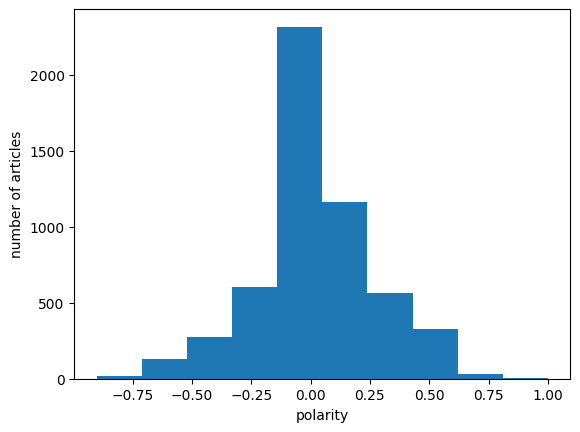

In [579]:
df_fr['polarity'].plot(kind ='hist')
plt.xlabel("polarity")
plt.ylabel("number of articles")

Text(0, 0.5, 'Number of articles')

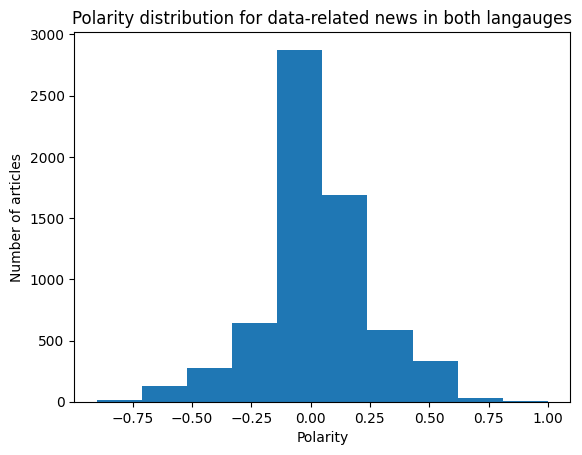

In [580]:
gen_df['polarity'].plot(kind = 'hist', title = 'Polarity distribution for data-related news in both langauges')
plt.xlabel("Polarity")
plt.ylabel("Number of articles")

In [555]:
fr_pol = df_fr.groupby(['date'])['polarity'].mean()

In [556]:
nl_pol = df_nl.groupby(['date'])['polarity'].mean()

In [547]:
import matplotlib.colors as mcolors

In [ ]:
plt.ylim(min(-1), max(1))

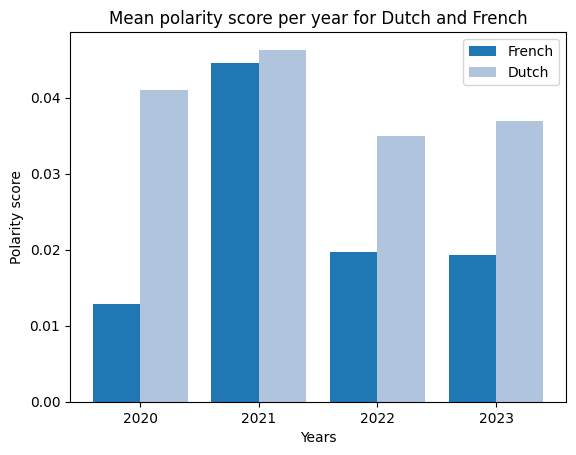

In [581]:
X = ['2020','2021','2022','2023']
polarity_fr = fr_pol
polarity_nl = nl_pol
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, polarity_fr, 0.4, label = 'French' )
plt.bar(X_axis + 0.2, polarity_nl, 0.4, label = 'Dutch', color = 'lightsteelblue')


plt.xticks(X_axis, X)
plt.xlabel("Years")
plt.ylabel("Polarity score")
plt.title("Mean polarity score per year for Dutch and French")
plt.legend()
plt.show()

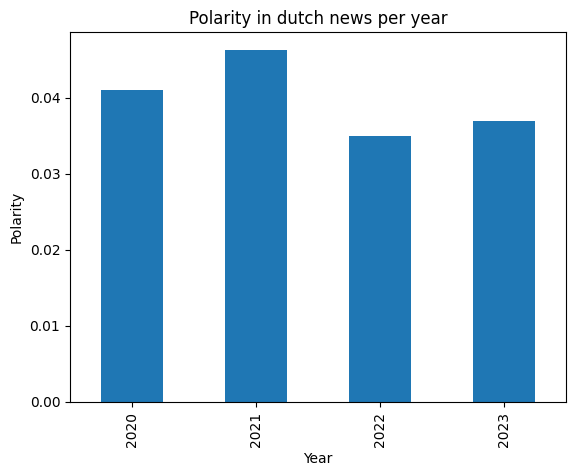

In [572]:
#ax1 = fr_pol.plot(kind = 'bar',  title = 'Polarity in french and dutch news per year', label = 'French')
ax2 = nl_pol.plot( kind = 'bar', title = 'Polarity in dutch news per year', label = 'Dutch')
plt.ylabel('Polarity')
plt.xlabel('Year')
plt.show()


Specific words

In [583]:
key_french = ['données personnelles','base des données', 'confidentialité','partager', 'accès aux données', 'réutilisation des données', 'utilisation des données', 'analyse des données', 'usage des données', 'protection des données']

In [584]:
key_dutch = ["persoonsgegevens", "gegevensgrondslag", "vertrouwelijkheid", "delen van gegevens", "toegang tot gegevens", "hergebruik van gegevens", "gebruik van gegevens", "gegevensanalyse", "gebruik van gegevens", "gegevensbescherming", "data", "data use" ,"data reusability", "data reuse", "data sharing", "data access", "data privacy", "data protection"]


In [586]:
df_fr.head(1)

,_id,title,text,date,url,polarity,language
0,5ec760338ae8910eece4965c,9 millions de clients concernés par une cybera...,"Dans un faible nombre de cas, les pirates ont ...",2020,https://plus.lesoir.be/301778/article/2020-05-...,0.0,fr


In [587]:
df_nl.head(1)

,title,text,date,url,_id,language,polarity
1,Gegevens 9 miljoen EasyJet-klanten gestolen,Luchtvaartmaatschappij EasyJet is getroffen do...,2020,https://www.nieuwsblad.be/cnt/dmf20200519_0496...,5ec8067060653ee843c32706,nl,0.01313


In [595]:
#French
list_fr = []
for row in range(len(df_fr)): 
    if 'protection des données' in str(df_fr.iloc[row, 2]):
        if df_fr.iloc[row, 2] not in list_fr:
            list_fr.append(df_fr.iloc[row, 2])

In [597]:
#Dutch
list_nl = []
for row in range(len(df_nl)): 
    if 'persoonsgegevens' in str(df_nl.iloc[row, 1]):
        if df_fr.iloc[row, 2] not in list_fr:
            list_nl.append(df_nl.iloc[row, 1])

In [599]:
frlist = list_fr[:100]

In [598]:
list_nl

97

In [ ]:
pers_data_nl_score = []
tb_nl



In [590]:
from textblob import Blobber
from textblob_fr import PatternTagger, PatternAnalyzer
from textblob_nl import PatternTagger, PatternAnalyzer

tb_fr = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())
tb_nl = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())

In [ ]:
polarity = tb_fr(doc['text']).sentiment[0]